In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# read data
file_path = 'JinjiangBooks.csv'
data = pd.read_csv(file_path)

# check the head
print(data.head())


   book_id book_name author  NonVIP_average_click  reviews_num  collected_num  \
0   113782    婆娑（GL）    暮成雪               28628.0       2946.0         6261.0   
1   113783     最后的童话     孤*                 511.0         18.0            0.0   
2   113784       梧桐雨    小翎子                 248.0          0.0            0.0   
3   113786   我拿什么来爱你    黑玻璃                 234.0          1.0            2.0   
4   113788  天上的秋千不寂寞   北方之北                 228.0          0.0            0.0   

   nutrient_num   credits          genre perspective  progress  \
0         475.0  83095680  原创-百合-近代现代-爱情          主受         1   
1           0.0    188633  原创-言情-近代现代-奇幻          女主         1   
2           0.0     56872  原创-言情-幻想未来-奇幻          女主         0   
3           0.0    223842  原创-纯爱-古色古香-爱情          主受         0   
4           0.0     24180  原创-言情-幻想未来-爱情          女主         1   

   contract_status  chapter_launch_time  total_word_count  
0                1  2006-12-16 10:24:42            21974

In [3]:
# 处理空缺信息，包括数字，日期，分类，视角
# Handle missing numeric data and fill it with 0
num_cols = ['NonVIP_average_click', 'reviews_num', 'collected_num', 'nutrient_num', 'credits', 'progress', 'contract_status', 'total_word_count']
data[num_cols] = data[num_cols].fillna(0)

# Missing values in the category type field are filled with "NONE"
cat_cols = ['genre', 'perspective']
data[cat_cols] = data[cat_cols].fillna('NONE')

# Handle date fields, missing or "Error" replaced with "0000-00-00 00:00:00"
data['chapter_launch_time'] = data['chapter_launch_time'].replace('Error', '0000-00-00 00:00:00').fillna('0000-00-00 00:00:00')

# Check the results after data preprocessing
print(data.head())

# Proceeding to model training and evaluation steps


   book_id book_name author  NonVIP_average_click  reviews_num  collected_num  \
0   113782    婆娑（GL）    暮成雪               28628.0       2946.0         6261.0   
1   113783     最后的童话     孤*                 511.0         18.0            0.0   
2   113784       梧桐雨    小翎子                 248.0          0.0            0.0   
3   113786   我拿什么来爱你    黑玻璃                 234.0          1.0            2.0   
4   113788  天上的秋千不寂寞   北方之北                 228.0          0.0            0.0   

   nutrient_num   credits          genre perspective  progress  \
0         475.0  83095680  原创-百合-近代现代-爱情          主受         1   
1           0.0    188633  原创-言情-近代现代-奇幻          女主         1   
2           0.0     56872  原创-言情-幻想未来-奇幻          女主         0   
3           0.0    223842  原创-纯爱-古色古香-爱情          主受         0   
4           0.0     24180  原创-言情-幻想未来-爱情          女主         1   

   contract_status  chapter_launch_time  total_word_count  
0                1  2006-12-16 10:24:42            21974

In [4]:
# 处理分类
# Break the genre column into subcolumns
data['genre'] = data['genre'].fillna('无-无-无-无')  # Fill in missing values first to ensure no errors in decomposition
expanded_genres = data['genre'].str.split('-', expand=True)

# Name the decomposed columns to ensure that no errors occur even if some columns do not exist
genre_columns = ['top_genre', 'sub_genre1', 'sub_genre2', 'sub_genre3']
for i, col in enumerate(genre_columns):
    if i < expanded_genres.shape[1]:  # Check whether the number of columns decomposed is sufficient
        data[col] = expanded_genres[i].fillna('无')  # Fill in possible missing values
    else:
        data[col] = '无'  # If there is no decomposed column at that position, populate 'None'

# Convert new categorical columns to one-hot encoding format
data = pd.get_dummies(data, columns=genre_columns)

# check result
print(data.head())

   book_id book_name author  NonVIP_average_click  reviews_num  collected_num  \
0   113782    婆娑（GL）    暮成雪               28628.0       2946.0         6261.0   
1   113783     最后的童话     孤*                 511.0         18.0            0.0   
2   113784       梧桐雨    小翎子                 248.0          0.0            0.0   
3   113786   我拿什么来爱你    黑玻璃                 234.0          1.0            2.0   
4   113788  天上的秋千不寂寞   北方之北                 228.0          0.0            0.0   

   nutrient_num   credits          genre perspective  ...  sub_genre3_悬疑  \
0         475.0  83095680  原创-百合-近代现代-爱情          主受  ...          False   
1           0.0    188633  原创-言情-近代现代-奇幻          女主  ...          False   
2           0.0     56872  原创-言情-幻想未来-奇幻          女主  ...          False   
3           0.0    223842  原创-纯爱-古色古香-爱情          主受  ...          False   
4           0.0     24180  原创-言情-幻想未来-爱情          女主  ...          False   

   sub_genre3_惊悚 sub_genre3_无  sub_genre3_武侠  sub_genre3

In [5]:
# 处理视角
# If there are missing values in the 'perspective' column, fill them first
data['perspective'] = data['perspective'].fillna('无')

# One-hot encoding using get_dummies
perspective_dummies = pd.get_dummies(data['perspective'], prefix='perspective')

# Concatenate the resulting one-hot encoded DataFrame back to the original DataFrame
data = pd.concat([data, perspective_dummies], axis=1)

# The original 'perspective' column can now be removed as it has been replaced by one-hot encoding
data.drop('perspective', axis=1, inplace=True)

# Check the data to confirm that the one-hot encoding column has been added correctly
print(data.head())


   book_id book_name author  NonVIP_average_click  reviews_num  collected_num  \
0   113782    婆娑（GL）    暮成雪               28628.0       2946.0         6261.0   
1   113783     最后的童话     孤*                 511.0         18.0            0.0   
2   113784       梧桐雨    小翎子                 248.0          0.0            0.0   
3   113786   我拿什么来爱你    黑玻璃                 234.0          1.0            2.0   
4   113788  天上的秋千不寂寞   北方之北                 228.0          0.0            0.0   

   nutrient_num   credits          genre  progress  ...  sub_genre3_童话  \
0         475.0  83095680  原创-百合-近代现代-爱情         1  ...          False   
1           0.0    188633  原创-言情-近代现代-奇幻         1  ...          False   
2           0.0     56872  原创-言情-幻想未来-奇幻         0  ...          False   
3           0.0    223842  原创-纯爱-古色古香-爱情         0  ...          False   
4           0.0     24180  原创-言情-幻想未来-爱情         1  ...          False   

  sub_genre3_西方衍生  sub_genre3_轻小说  perspective_NONE  perspective_不明 

In [6]:
# 检查 'credits' 列中的非数值数据
# 这将打印出所有 'credits' 列中的非数值行
invalid_credits = pd.to_numeric(data['credits'], errors='coerce').isna()
print(data[invalid_credits])

# 选择如何处理这些行：可以选择删除它们，或者替换为合理的数值
# 例如，这里我们选择将它们替换为0
data.loc[invalid_credits, 'credits'] = 0

# 确保 'credits' 列是数值类型
data['credits'] = pd.to_numeric(data['credits'])

Empty DataFrame
Columns: [book_id, book_name, author, NonVIP_average_click, reviews_num, collected_num, nutrient_num, credits, genre, progress, contract_status, chapter_launch_time, total_word_count, top_genre_, top_genre_原创, top_genre_未知, top_genre_衍生, top_genre_评论, top_genre_诗歌, top_genre_随笔, sub_genre1_, sub_genre1_女尊, sub_genre1_无, sub_genre1_无CP, sub_genre1_百合, sub_genre1_纯爱, sub_genre1_言情, sub_genre2_, sub_genre2_古色古香, sub_genre2_幻想未来, sub_genre2_无, sub_genre2_架空历史, sub_genre2_近代现代, sub_genre3_, sub_genre3_东方衍生, sub_genre3_仙侠, sub_genre3_传奇, sub_genre3_其他衍生, sub_genre3_剧情, sub_genre3_古典衍生, sub_genre3_奇幻, sub_genre3_悬疑, sub_genre3_惊悚, sub_genre3_无, sub_genre3_武侠, sub_genre3_游戏, sub_genre3_爱情, sub_genre3_科幻, sub_genre3_童话, sub_genre3_西方衍生, sub_genre3_轻小说, perspective_NONE, perspective_不明, perspective_主受, perspective_主攻, perspective_互攻, perspective_女主, perspective_男主]
Index: []

[0 rows x 58 columns]


In [7]:
# 处理日期数据：将 'chapter_launch_time' 转换为距离最小日期的天数
data['chapter_launch_time'] = pd.to_datetime(data['chapter_launch_time'], errors='coerce')  # 转换日期，无效数据转为 NaT
min_date = data['chapter_launch_time'].min()  # 获取最小日期
data['days_from_min_date'] = (data['chapter_launch_time'] - min_date).dt.days  # 计算天数差
data.drop('chapter_launch_time', axis=1, inplace=True)  # 删除原始日期列

# 填充由于日期无效导致的缺失值
data['days_from_min_date'].fillna(0, inplace=True)  # 假设无效日期距离最小日期的天数为0

C:\Users\aaqqi\AppData\Local\Temp\ipykernel_13048\905966682.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['days_from_min_date'].fillna(0, inplace=True)  # 假设无效日期距离最小日期的天数为0


In [24]:
# 确保所有操作都正确执行
data.drop(['book_name', 'author', 'genre', 'book_id'], axis=1, inplace=True)

# 再次检查列名，确认删除操作成功
print(data.columns)


Index(['NonVIP_average_click', 'reviews_num', 'collected_num', 'nutrient_num',
       'credits', 'progress', 'contract_status', 'total_word_count',
       'top_genre_', 'top_genre_原创', 'top_genre_未知', 'top_genre_衍生',
       'top_genre_评论', 'top_genre_诗歌', 'top_genre_随笔', 'sub_genre1_',
       'sub_genre1_女尊', 'sub_genre1_无', 'sub_genre1_无CP', 'sub_genre1_百合',
       'sub_genre1_纯爱', 'sub_genre1_言情', 'sub_genre2_', 'sub_genre2_古色古香',
       'sub_genre2_幻想未来', 'sub_genre2_无', 'sub_genre2_架空历史', 'sub_genre2_近代现代',
       'sub_genre3_', 'sub_genre3_东方衍生', 'sub_genre3_仙侠', 'sub_genre3_传奇',
       'sub_genre3_其他衍生', 'sub_genre3_剧情', 'sub_genre3_古典衍生', 'sub_genre3_奇幻',
       'sub_genre3_悬疑', 'sub_genre3_惊悚', 'sub_genre3_无', 'sub_genre3_武侠',
       'sub_genre3_游戏', 'sub_genre3_爱情', 'sub_genre3_科幻', 'sub_genre3_童话',
       'sub_genre3_西方衍生', 'sub_genre3_轻小说', 'perspective_NONE',
       'perspective_不明', 'perspective_主受', 'perspective_主攻', 'perspective_互攻',
       'perspective_女主', 'perspective

In [9]:
import pandas as pd

# 假设 data 是您已经加载并处理好的 DataFrame
# 指定要保存的CSV文件路径
output_file_path = 'processed_data.csv'  # 修改为您希望保存文件的具体路径

# 将DataFrame保存到CSV
data.to_csv(output_file_path, index=False, encoding='utf-8-sig')

print(f"Data has been successfully saved to {output_file_path}")


Data has been successfully saved to processed_data.csv


In [10]:
# 打印列名，检查是否有拼写错误或未被删除的列
print(data.columns)

# 查看DataFrame的前几行，确认数据的当前状态
print(data.head())


Index(['NonVIP_average_click', 'reviews_num', 'collected_num', 'nutrient_num',
       'credits', 'progress', 'contract_status', 'total_word_count',
       'top_genre_', 'top_genre_原创', 'top_genre_未知', 'top_genre_衍生',
       'top_genre_评论', 'top_genre_诗歌', 'top_genre_随笔', 'sub_genre1_',
       'sub_genre1_女尊', 'sub_genre1_无', 'sub_genre1_无CP', 'sub_genre1_百合',
       'sub_genre1_纯爱', 'sub_genre1_言情', 'sub_genre2_', 'sub_genre2_古色古香',
       'sub_genre2_幻想未来', 'sub_genre2_无', 'sub_genre2_架空历史', 'sub_genre2_近代现代',
       'sub_genre3_', 'sub_genre3_东方衍生', 'sub_genre3_仙侠', 'sub_genre3_传奇',
       'sub_genre3_其他衍生', 'sub_genre3_剧情', 'sub_genre3_古典衍生', 'sub_genre3_奇幻',
       'sub_genre3_悬疑', 'sub_genre3_惊悚', 'sub_genre3_无', 'sub_genre3_武侠',
       'sub_genre3_游戏', 'sub_genre3_爱情', 'sub_genre3_科幻', 'sub_genre3_童话',
       'sub_genre3_西方衍生', 'sub_genre3_轻小说', 'perspective_NONE',
       'perspective_不明', 'perspective_主受', 'perspective_主攻', 'perspective_互攻',
       'perspective_女主', 'perspective

In [11]:
# 打印每列的数据类型
print(data.dtypes)


NonVIP_average_click    float64
reviews_num             float64
collected_num           float64
nutrient_num            float64
credits                   int64
progress                  int64
contract_status           int64
total_word_count          int64
top_genre_                 bool
top_genre_原创               bool
top_genre_未知               bool
top_genre_衍生               bool
top_genre_评论               bool
top_genre_诗歌               bool
top_genre_随笔               bool
sub_genre1_                bool
sub_genre1_女尊              bool
sub_genre1_无               bool
sub_genre1_无CP             bool
sub_genre1_百合              bool
sub_genre1_纯爱              bool
sub_genre1_言情              bool
sub_genre2_                bool
sub_genre2_古色古香            bool
sub_genre2_幻想未来            bool
sub_genre2_无               bool
sub_genre2_架空历史            bool
sub_genre2_近代现代            bool
sub_genre3_                bool
sub_genre3_东方衍生            bool
sub_genre3_仙侠              bool
sub_genr

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = 'processed_data.csv'  # 确保这是您数据文件的正确路径
data = pd.read_csv(file_path)
# 假设 data 是您已经正确处理的 DataFrame
# 准备输入特征X和目标变量y
X = data.drop('credits', axis=1)  # 移除目标变量列
y = data['credits']  # 目标变量

# 划分训练集和测试集，比例为80%训练，20%测试
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型实例
model = LinearRegression()

# 训练模型
model.fit(X_train, y_train)

# 在测试集上进行预测
y_pred = model.predict(X_test)

# 计算模型性能指标
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# 输出模型性能
print("均方误差 (MSE):", mse)
print("决定系数 (R^2):", r2)


均方误差 (MSE): 3155768450839391.0
决定系数 (R^2): 0.9907157571544475


In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# 创建一个带有数据标准化步骤的管道
pipeline = make_pipeline(StandardScaler(), LinearRegression())

# 使用管道重新训练模型
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# 计算更新后的MSE和R²
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("更新后的均方误差 (MSE):", mse)
print("更新后的决定系数 (R^2):", r2)


更新后的均方误差 (MSE): 3155691866447343.5
更新后的决定系数 (R^2): 0.990715982465051


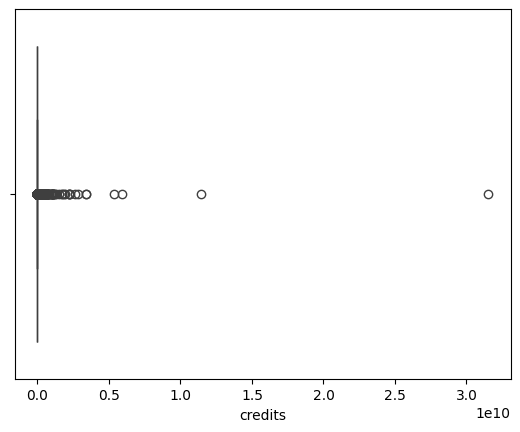

处理异常值后的均方误差 (MSE): 47244621367890.07
处理异常值后的决定系数 (R^2): 0.8077547862238708


In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# 可视化目标变量以查看是否有明显的异常值
sns.boxplot(x=data['credits'])
plt.show()

# 可以考虑剔除一些极端的异常值
q_low = data['credits'].quantile(0.01)
q_hi  = data['credits'].quantile(0.99)

filtered_data = data[(data['credits'] > q_low) & (data['credits'] < q_hi)]

# 重新划分数据
X_filtered = filtered_data.drop('credits', axis=1)
y_filtered = filtered_data['credits']

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("处理异常值后的均方误差 (MSE):", mse)
print("处理异常值后的决定系数 (R^2):", r2)


In [15]:
from sklearn.ensemble import RandomForestRegressor

# 使用随机森林模型
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("随机森林模型的均方误差 (MSE):", mse_rf)
print("随机森林模型的决定系数 (R^2):", r2_rf)


随机森林模型的均方误差 (MSE): 43381303114941.76
随机森林模型的决定系数 (R^2): 0.8234751882912277


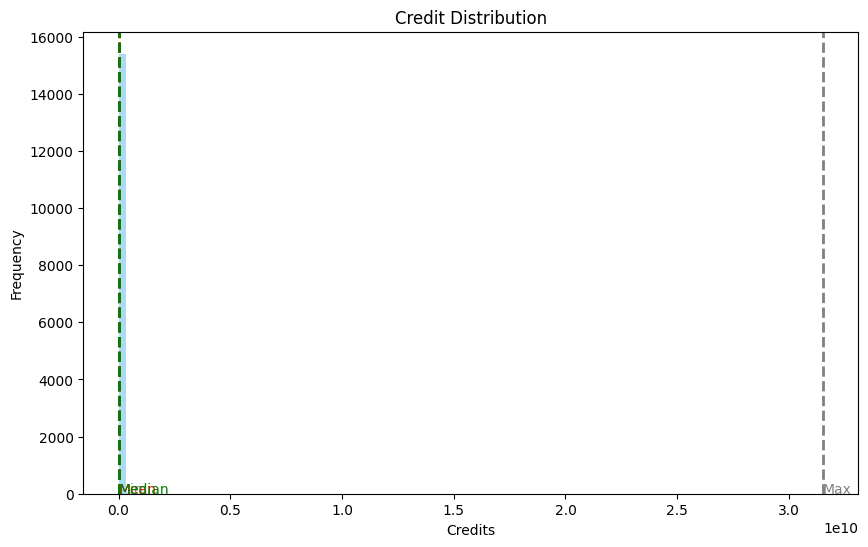

min_credit: 0
max_credit: 31525783552
mean_credit: 12500091.515873017
median_credit: 51959.5


In [17]:
# 统计指标
min_credit = data['credits'].min()
max_credit = data['credits'].max()
mean_credit = data['credits'].mean()
median_credit = data['credits'].median()

# 画图
plt.figure(figsize=(10, 6))
plt.hist(data['credits'], bins=100, color='skyblue', alpha=0.7)

# 标注统计指标
plt.axvline(min_credit, color='grey', linestyle='dashed', linewidth=2)
plt.axvline(max_credit, color='grey', linestyle='dashed', linewidth=2)
plt.axvline(mean_credit, color='red', linestyle='dashed', linewidth=2)
plt.axvline(median_credit, color='green', linestyle='dashed', linewidth=2)

# 添加文本
plt.text(min_credit, 0, 'Min', rotation=0, color='grey')
plt.text(max_credit, 0, 'Max', rotation=0, color='grey')
plt.text(mean_credit, 0, 'Mean', rotation=0, color='red')
plt.text(median_credit, 0, 'Median', rotation=0, color='green')

# 标题和标签
plt.title('Credit Distribution')
plt.xlabel('Credits')
plt.ylabel('Frequency')

# 显示图像
plt.show()
print("min_credit:",min_credit)
print("max_credit:",max_credit)
print("mean_credit:",mean_credit)
print("median_credit:",median_credit)

In [35]:
# import pandas as pd

# # 请确保文件路径正确
# file_path = '/mnt/data/JinjiangBooks.csv'
# data = pd.read_csv(file_path)

# 确保列名是正确的，这里假设书名和作者列分别命名为 'book_name' 和 'author'
if 'book_name' not in data.columns or 'author' not in data.columns or 'credits' not in data.columns:
    print("One of the columns 'book_name', 'author', or 'credits' is not found in the data. Here are the column names:")
    print(data.columns)
else:
    # 对 'credits' 进行降序排序
    top_books = data.sort_values(by='credits', ascending=False).head(60)

    # 打印前10的书名、作者和credits
    print(top_books[['book_name', 'author', 'credits']])



            book_name author      credits
8740            破云2吞海     淮上  31525783552
6617         PUBG世纪网恋    酱子贝  11433991168
7634              七芒星    木瓜黄   5906141184
4731            你也有今天    叶斐然   5375237632
7005     离婚之后我还穿着你的外套   不问三九   3431840512
12184   谁说Omega就不能A爆了    青梅酱   3420398592
15192         失忆后认错老公    小文旦   2861295872
4875             谎言之诚   楚寒衣青   2651904256
10547      成了绝症男配的兔子精   美人无霜   2245906688
7152            天生富贵骨    木兮娘   2240822016
15428       我们猫猫不能听这些     多梨   2205347072
13672       万人嫌阴郁受重生了    东施娘   2179742976
14732           言灵直播战   撕枕犹眠   1946312320
9730           对你见色起意     令栖   1889561216
6239          带资进组的戏精   阿辞姑娘   1751754112
5649        在逃生游戏里撩宿敌     临钥   1728592640
11649        我怀了反派的孩子   公子闻筝   1489375232
5793            你是哪颗星     常冬   1279464704
6346          影帝的隐婚妻子    雪花肉   1245243904
14856      咸鱼真少爷上交系统后     临钥   1182128512
9489             无限副本    轻云淡   1114075904
15051     科学怪人的萌娃饲养日常   春风榴火   1108448384
10685     偏执大佬求放过[快穿]   山有青木   109

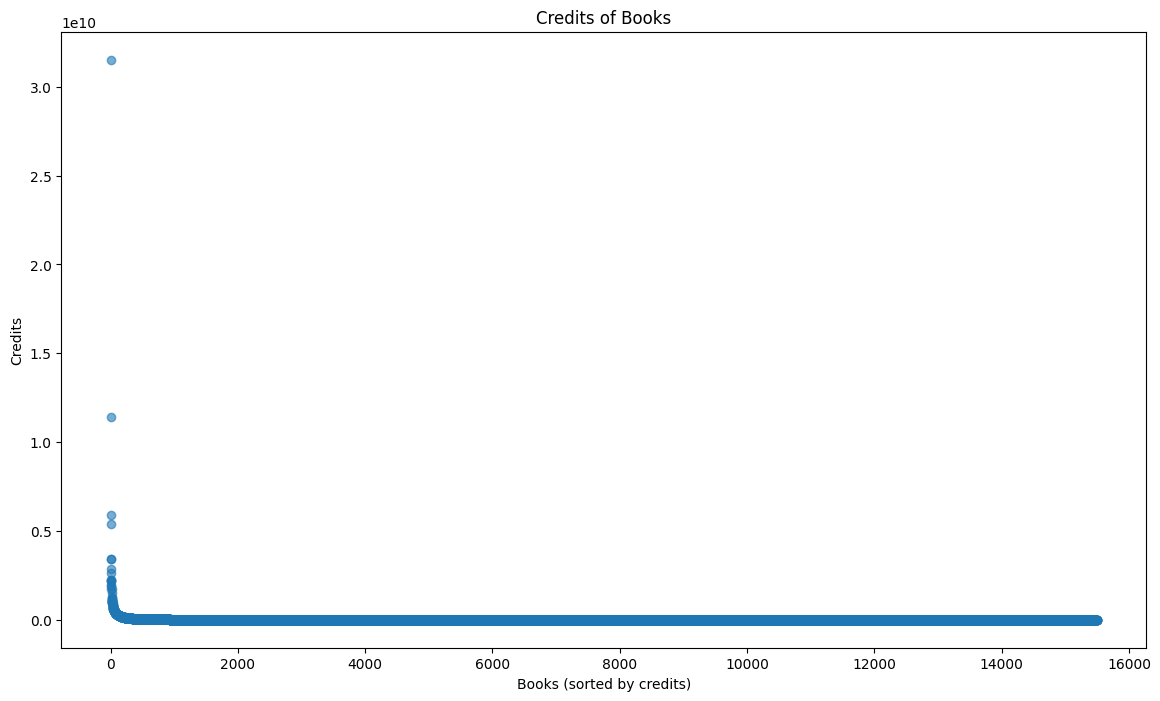

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

if 'credits' not in data.columns:
    print("The 'credits' column is not found in the data. Here are the column names:")
    print(data.columns)
else:
    # 排序
    data_sorted = data.sort_values(by='credits', ascending=False)

    # 画点图
    plt.figure(figsize=(14, 8))
    plt.scatter(range(data_sorted.shape[0]), data_sorted['credits'], alpha=0.6)
    plt.title('Credits of Books')
    plt.xlabel('Books (sorted by credits)')
    plt.ylabel('Credits')
    plt.show()

In [37]:
    # 使用KMeans进行无监督分类
    # 假设我们想将书分成3类
    kmeans = KMeans(n_clusters=3, random_state=42)
    # 进行拟合，但是KMeans需要二维输入，因此使用credits列的值进行reshape
    kmeans.fit(data_sorted['credits'].values.reshape(-1, 1))
    
    # 将分类结果添加到数据框中
    data_sorted['cluster'] = kmeans.labels_
    
    # 打印分组结果
    print(data_sorted[['book_name', 'author', 'credits', 'cluster']].head(10))

           book_name author      credits  cluster
8740           破云2吞海     淮上  31525783552        1
6617        PUBG世纪网恋    酱子贝  11433991168        2
7634             七芒星    木瓜黄   5906141184        2
4731           你也有今天    叶斐然   5375237632        2
7005    离婚之后我还穿着你的外套   不问三九   3431840512        0
12184  谁说Omega就不能A爆了    青梅酱   3420398592        0
15192        失忆后认错老公    小文旦   2861295872        0
4875            谎言之诚   楚寒衣青   2651904256        0
10547     成了绝症男配的兔子精   美人无霜   2245906688        0
7152           天生富贵骨    木兮娘   2240822016        0


Total number of clusters: 5
Cluster 0: Credit range 0 - 271784672, Number of books: 15384
Cluster 1: Credit range 31525783552 - 31525783552, Number of books: 1
Cluster 2: Credit range 5375237632 - 11433991168, Number of books: 3
Cluster 3: Credit range 277320896 - 1279464704, Number of books: 97
Cluster 4: Credit range 1489375232 - 3431840512, Number of books: 13


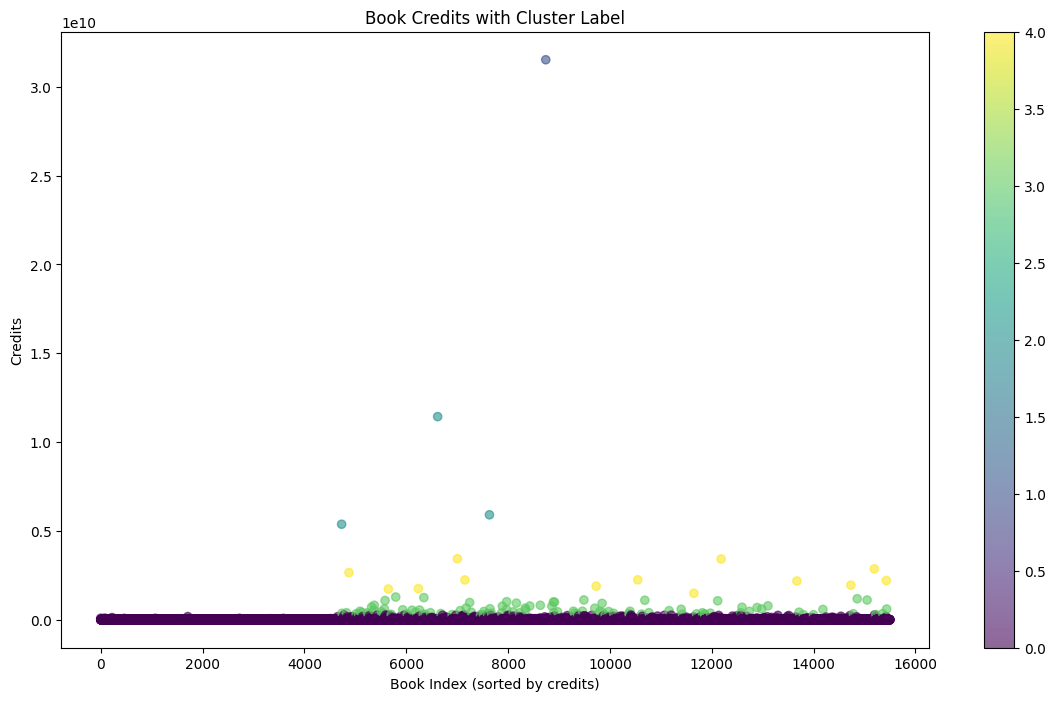

In [39]:
# 确认 'credits' 列存在并为数值类型
if 'credits' in data.columns and pd.api.types.is_numeric_dtype(data['credits']):
    # 标准化 'credits' 列以准备进行KMeans聚类
    scaler = StandardScaler()
    credits_scaled = scaler.fit_transform(data[['credits']])
    
    # 使用KMeans算法对书籍的 'credits' 进行聚类
    kmeans = KMeans(n_clusters=5, random_state=42)
    data['cluster'] = kmeans.fit_predict(credits_scaled)
    
    # 打印总共分了多少组
    n_clusters = data['cluster'].nunique()
    print(f"Total number of clusters: {n_clusters}")
    
    # 打印每一组的credit区间及书的数量
    for cluster in range(n_clusters):
        cluster_data = data[data['cluster'] == cluster]
        min_credit = cluster_data['credits'].min()
        max_credit = cluster_data['credits'].max()
        count_books = cluster_data.shape[0]
        print(f"Cluster {cluster}: Credit range {min_credit} - {max_credit}, Number of books: {count_books}")
    
    # 绘制点图，每个点代表一本书
    plt.figure(figsize=(14, 8))
    plt.scatter(range(data.shape[0]), data['credits'], c=data['cluster'], cmap='viridis', alpha=0.6)
    plt.colorbar()
    plt.title('Book Credits with Cluster Label')
    plt.xlabel('Book Index (sorted by credits)')
    plt.ylabel('Credits')
    plt.show()
else:
    print("'credits' column is not in the dataframe or not a numeric type.")

In [66]:
# 确认 'NonVIP_average_click' 列存在并为数值类型
if 'NonVIP_average_click' in data.columns and pd.api.types.is_numeric_dtype(data['NonVIP_average_click']):
    # 标准化 'NonVIP_average_click' 列以准备进行KMeans聚类
    scaler = StandardScaler()
    credits_scaled = scaler.fit_transform(data[['NonVIP_average_click']])

    # 使用KMeans算法对书籍的 'NonVIP_average_click' 进行聚类
    kmeans = KMeans(n_clusters=3, random_state=42)
    data['cluster'] = kmeans.fit_predict(credits_scaled)

    # 计算每个簇的统计数据并找出数量最多的簇
    cluster_stats = data.groupby('cluster')['NonVIP_average_click'].agg(['count']).reset_index()
    largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

    # 筛选出数量最多簇的数据
    largest_cluster_data = data[data['cluster'] == largest_cluster]

    # 对该簇数据进行线性回归模型的训练
    X = largest_cluster_data.drop([ 'cluster','book_name', 'author', 'genre', 'book_id', 'NonVIP_average_click'], axis=1)
    y = largest_cluster_data['NonVIP_average_click']

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 创建线性回归模型
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # 进行预测
    y_pred = lr_model.predict(X_test)

    # 性能评估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Linear Regression model for the largest cluster (Cluster {largest_cluster}):")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")

else:
    print("'credits' column is not in the dataframe or not a numeric type.")

Linear Regression model for the largest cluster (Cluster 0):
MSE: 7971384.431418674
R²: 0.6736057941683102


In [65]:
# 这段代码将打印测试集中前10本书的信息，以及它们的真实和预测credits。
# 首先，我们需要确保已经拥有上下文中之前定义的模型和数据集。

# 取测试集中的前10条数据
test_data_subset = X_test.head(50)
actual_NonVIP_average_click = y_test.head(50)
predicted_NonVIP_average_click = pd.Series(lr_model.predict(test_data_subset), index=actual_NonVIP_average_click.index)

# 创建一个新的DataFrame来比较实际值和预测值
comparison = pd.DataFrame(data={
    'Book Name': data.loc[test_data_subset.index, 'book_name'],
    'Author': data.loc[test_data_subset.index, 'author'],
    'actual NonVIP click': actual_NonVIP_average_click,
    'predicted NonVIP click': predicted_NonVIP_average_click
})

print(comparison)


                      Book Name     Author  actual NonVIP click  \
11179                  红楼之宝玉在开挂       北有凉城                  0.0   
14013                  论魂穿后的创世录   颓废作者的幻想乡                 30.0   
9964                     [死神]归于       末世情缘                  0.0   
8704                       她的少年        盛楚葵                  0.0   
14795                     我眼里的你        俞伯牙                  0.0   
6867            [我的英雄学院]轰少年的成长史   小花不是hana                  0.0   
13355                   游离在世界之外         汶水                  0.0   
14521                      蓝色妖姬         舍灰                  0.0   
11733            （楚留香传奇）吃枣药丸的人生         安妧                  0.0   
6109                        浮生梦       三千岁锦                  0.0   
15199                       没想好        芊纸c                  0.0   
14086                        狻猊       1847                  0.0   
15397                        晚枫         念宰                  3.0   
12433                      假戏真心      MS绮玖君                  0.

In [67]:
# 统计 'NonVIP_average_click' 为 0 的书籍数量
zero_clicks_count = (data['NonVIP_average_click'] == 0).sum()
print(f"Number of books with 'NonVIP_average_click' == 0: {zero_clicks_count}")

Number of books with 'NonVIP_average_click' == 0: 2605


In [68]:
# 过滤掉 'NonVIP_average_click' 为 0 的书籍
filtered_data = data[data['NonVIP_average_click'] != 0]

# 选择特征和目标变量，这次我们假设 'credits' 是目标变量
X = filtered_data.drop(['book_name', 'author', 'genre', 'book_id', 'credits'], axis=1)
y = filtered_data['credits']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建线性回归模型
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# 进行预测
y_pred = lr_model.predict(X_test)

# 性能评估
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Linear Regression model after filtering books with zero 'NonVIP_average_click':")
print(f"MSE: {mse}")
print(f"R²: {r2}")

Linear Regression model after filtering books with zero 'NonVIP_average_click':
MSE: 1594280440829724.5
R²: 0.8123837592803623


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



# 确认 'NonVIP_average_click' 列存在并为数值类型
if 'NonVIP_average_click' in data.columns and pd.api.types.is_numeric_dtype(data['NonVIP_average_click']):
    # 过滤掉 'NonVIP_average_click' 为 0 的书籍
    filtered_data = data[data['NonVIP_average_click'] > 2000]

    # 标准化 'NonVIP_average_click' 列以准备进行KMeans聚类
    scaler = StandardScaler()
    # nonvip_scaled = scaler.fit_transform(filtered_data[['NonVIP_average_click']])
    credits_scaled = scaler.fit_transform(filtered_data[['credits']])

    # 使用KMeans算法对书籍的 'NonVIP_average_click' 进行聚类
    kmeans = KMeans(n_clusters=3, random_state=42)
    filtered_data['cluster'] = kmeans.fit_predict(credits_scaled)

    # 计算每个簇的统计数据并找出数量最多的簇
    # cluster_stats = filtered_data.groupby('cluster')['NonVIP_average_click'].agg(['count']).reset_index()
    cluster_stats = filtered_data.groupby('cluster')['credits'].agg(['count']).reset_index()
    largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

    # 筛选出数量最多簇的数据
    largest_cluster_data = filtered_data[filtered_data['cluster'] == largest_cluster]

    # 对该簇数据进行线性回归模型的训练
    # X = largest_cluster_data.drop(['book_name', 'author', 'genre', 'book_id',  'cluster','NonVIP_average_click'], axis=1)
    X = largest_cluster_data['credits', 'reviews_num', 'collected_num', 'nutrient_num', 'contract_status', 'total_word_count']
    y = largest_cluster_data['NonVIP_average_click']

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 创建线性回归模型
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # 进行预测
    y_pred = lr_model.predict(X_test)

    # 性能评估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Linear Regression model for the largest cluster (Cluster {largest_cluster}):")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")


    degree = 3  # 可以调整多项式的度数来看不同的效果
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # 对该簇数据进行多项式回归模型的训练
    poly_model.fit(X_train, y_train)

    # 进行预测
    y_pred_poly = poly_model.predict(X_test)

    # 性能评估
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f"Polynomial Regression model (degree {degree}):")
    print(f"MSE: {mse_poly}")
    print(f"R²: {r2_poly}")

else:
    print("'NonVIP_average_click' column is not in the dataframe or not a numeric type.")


C:\Users\aaqqi\AppData\Local\Temp\ipykernel_29664\1579764794.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = kmeans.fit_predict(credits_scaled)


Linear Regression model for the largest cluster (Cluster 0):
MSE: 558543561.3906344
R²: 0.5117245188406718
Polynomial Regression model (degree 3):
MSE: 686546016412.7775
R²: -599.1744710248663


In [12]:
# 取测试集中的前10条数据
test_data_subset = X_test.head(20)
actual_NonVIP_average_click = y_test.head(20)
predicted_NonVIP_average_click = pd.Series(lr_model.predict(test_data_subset), index=actual_NonVIP_average_click.index)

# 创建一个新的DataFrame来比较实际值和预测值
comparison = pd.DataFrame(data={
    'Book Name': data.loc[test_data_subset.index, 'book_name'],
    'Author': data.loc[test_data_subset.index, 'author'],
    'actual NonVIP click': actual_NonVIP_average_click,
    'predicted NonVIP click': predicted_NonVIP_average_click
})

print(comparison)

              Book Name    Author  actual NonVIP click  predicted NonVIP click
5787          第五人格医生x律师       奶绿熊               2776.0             8421.817020
10083                奴隶      遵从生活               3804.0            11780.835137
2234            群狼吃掉小白兔        梓兮               5296.0             6139.737805
1841       迹部旒耀[网球王子同人]      未神公子              84989.0             8631.417620
5233          当四爷爱上女装大佬  一只好吃懒做的猪               2917.0            10099.333721
13513     公户女Alpha[ABO]        刀尔              31768.0            38128.896838
11782             重生沉冤录       文子衿               3368.0            -6163.762517
3332          颠覆大清之强人穿越      明月窥人              32761.0            17551.803367
5516   我和老攻的恋爱的恋爱循环[快穿]        喵污               8313.0              517.193642
4111               清韵婉唱      古调今弹               7439.0            12584.190888
5699              A级驭灵师        明柿              15231.0            21880.461235
4783            教授家的小可爱       风铃笑              78577

In [13]:
# 取测试集中的前10条数据
test_data_subset = X_test.head(20)
actual_NonVIP_average_click = y_test.head(20)
predicted_NonVIP_average_click = pd.Series(poly_model.predict(test_data_subset), index=actual_NonVIP_average_click.index)

# 创建一个新的DataFrame来比较实际值和预测值
comparison = pd.DataFrame(data={
    'Book Name': data.loc[test_data_subset.index, 'book_name'],
    'Author': data.loc[test_data_subset.index, 'author'],
    'actual NonVIP click': actual_NonVIP_average_click,
    'predicted NonVIP click': predicted_NonVIP_average_click
})

print(comparison)

              Book Name    Author  actual NonVIP click  predicted NonVIP click
5787          第五人格医生x律师       奶绿熊               2776.0             7433.984903
10083                奴隶      遵从生活               3804.0             7432.510276
2234            群狼吃掉小白兔        梓兮               5296.0             7312.860328
1841       迹部旒耀[网球王子同人]      未神公子              84989.0             9185.618200
5233          当四爷爱上女装大佬  一只好吃懒做的猪               2917.0             7399.019133
13513     公户女Alpha[ABO]        刀尔              31768.0            40577.017380
11782             重生沉冤录       文子衿               3368.0             7420.408392
3332          颠覆大清之强人穿越      明月窥人              32761.0            32556.408207
5516   我和老攻的恋爱的恋爱循环[快穿]        喵污               8313.0             8684.399255
4111               清韵婉唱      古调今弹               7439.0             7316.487980
5699              A级驭灵师        明柿              15231.0            24406.910944
4783            教授家的小可爱       风铃笑              78577

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline



# 确认 'NonVIP_average_click' 列存在并为数值类型
if 'NonVIP_average_click' in data.columns and pd.api.types.is_numeric_dtype(data['NonVIP_average_click']):
    # 过滤掉 'NonVIP_average_click' 为 0 的书籍
    filtered_data = data[data['NonVIP_average_click'] > 2000]

    # 标准化 'NonVIP_average_click' 列以准备进行KMeans聚类
    scaler = StandardScaler()
    # nonvip_scaled = scaler.fit_transform(filtered_data[['NonVIP_average_click']])
    credits_scaled = scaler.fit_transform(filtered_data[['credits']])

    # 使用KMeans算法对书籍的 'NonVIP_average_click' 进行聚类
    kmeans = KMeans(n_clusters=10, random_state=42)
    filtered_data['cluster'] = kmeans.fit_predict(credits_scaled)

    # 计算每个簇的统计数据并找出数量最多的簇
    # cluster_stats = filtered_data.groupby('cluster')['NonVIP_average_click'].agg(['count']).reset_index()
    cluster_stats = filtered_data.groupby('cluster')['credits'].agg(['count']).reset_index()
    largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

    # 筛选出数量最多簇的数据
    largest_cluster_data = filtered_data[filtered_data['cluster'] == largest_cluster]

    # 对该簇数据进行线性回归模型的训练
    # X = largest_cluster_data.drop(['book_name', 'author', 'genre', 'book_id',  'cluster','NonVIP_average_click'], axis=1)
    X = largest_cluster_data[['credits', 'reviews_num', 'collected_num', 'nutrient_num', 'contract_status', 'total_word_count']]

    y = largest_cluster_data['NonVIP_average_click']

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 创建线性回归模型
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)

    # 进行预测
    y_pred = lr_model.predict(X_test)

    # 性能评估
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"Linear Regression model for the largest cluster (Cluster {largest_cluster}):")
    print(f"MSE: {mse}")
    print(f"R²: {r2}")


    degree = 3  # 可以调整多项式的度数来看不同的效果
    poly_model = make_pipeline(PolynomialFeatures(degree), LinearRegression())

    # 对该簇数据进行多项式回归模型的训练
    poly_model.fit(X_train, y_train)

    # 进行预测
    y_pred_poly = poly_model.predict(X_test)

    # 性能评估
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f"Polynomial Regression model (degree {degree}):")
    print(f"MSE: {mse_poly}")
    print(f"R²: {r2_poly}")

else:
    print("'NonVIP_average_click' column is not in the dataframe or not a numeric type.")


Linear Regression model for the largest cluster (Cluster 0):
MSE: 214676737.7855091
R²: 0.12068852090234683
Polynomial Regression model (degree 3):
MSE: 626623758.6547399
R²: -1.5666379587477737


C:\Users\aaqqi\AppData\Local\Temp\ipykernel_13048\3476902741.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = kmeans.fit_predict(credits_scaled)


In [14]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# 假设已经有一个预处理好的DataFrame `data` 和目标列 'nonVIP_average_click'
features = ['reviews_num', 'collected_num', 'nutrient_num', 'contract_status', 'total_word_count']
X = data[features]
y = data['NonVIP_average_click']

# 数据划分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# 评估模型
mse = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {mse}")

# 预测
y_pred = model.predict(X_test_scaled)


Epoch 1/50


c:\Users\aaqqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 181026736.0000 - val_loss: 437488480.0000
Epoch 2/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 165012128.0000 - val_loss: 375943200.0000
Epoch 3/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 173981552.0000 - val_loss: 282808896.0000
Epoch 4/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 163567808.0000 - val_loss: 209443776.0000
Epoch 5/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 222582272.0000 - val_loss: 160078736.0000
Epoch 6/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 123017640.0000 - val_loss: 124466880.0000
Epoch 7/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 79054000.0000 - val_loss: 99999664.0000
Epoch 8/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 114998096.0000 - val_loss: 84303584.0000
Epoch 9/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 129664624.0000 - val_loss: 73948328.0000
Epoch 10/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 165141040.0000 - val_loss: 69207840.

In [17]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# 选择特征和目标变量
X = data.drop(['book_name', 'author', 'genre', 'book_id', 'NonVIP_average_click'], axis=1)
y = data['NonVIP_average_click']

# 划分数据集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 特征标准化
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 建立神经网络模型
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])

# 编译模型
model.compile(optimizer='adam', loss='mse')

# 训练模型
model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

# 评估模型
mse = model.evaluate(X_test_scaled, y_test)
print(f"Test MSE: {mse}")

# 预测
y_pred = model.predict(X_test_scaled)


Epoch 1/50


c:\Users\aaqqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 210723888.0000 - val_loss: 428866240.0000
Epoch 2/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 192839136.0000 - val_loss: 362126912.0000
Epoch 3/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 155371728.0000 - val_loss: 262732400.0000
Epoch 4/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 167210896.0000 - val_loss: 197449264.0000
Epoch 5/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 225602304.0000 - val_loss: 150104944.0000
Epoch 6/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 134055120.0000 - val_loss: 110454992.0000
Epoch 7/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 121446880.0000 - val_loss: 85900136.0000
Epoch 8/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 74483648.0000 - val_loss: 73392304.0000
Epoch 9/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 215659248.0000 - val_loss: 66993344.0000
Epoch 10/50
310/310 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 70875728.0000 - val_loss: 64808252.0

In [22]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



# 确保所需列名存在，以防KeyError
columns_to_drop = ['book_name', 'author', 'genre', 'book_id']
if set(columns_to_drop).issubset(data.columns):


    # 过滤掉 'NonVIP_average_click' 为 0 的书籍
    filtered_data = data[data['NonVIP_average_click'] > 10]

    # 标准化 'NonVIP_average_click' 列以准备进行KMeans聚类
    scaler = StandardScaler()
    # nonvip_scaled = scaler.fit_transform(filtered_data[['NonVIP_average_click']])
    credits_scaled = scaler.fit_transform(filtered_data[['credits']])

    # 使用KMeans算法对书籍的 'NonVIP_average_click' 进行聚类
    kmeans = KMeans(n_clusters=5, random_state=42)
    filtered_data['cluster'] = kmeans.fit_predict(credits_scaled)

    # 计算每个簇的统计数据并找出数量最多的簇
    # cluster_stats = filtered_data.groupby('cluster')['NonVIP_average_click'].agg(['count']).reset_index()
    cluster_stats = filtered_data.groupby('cluster')['credits'].agg(['count']).reset_index()
    largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

    # 筛选出数量最多簇的数据
    largest_cluster_data = filtered_data[filtered_data['cluster'] == largest_cluster]



    X = largest_cluster_data.drop(columns_to_drop + ['NonVIP_average_click'], axis=1)
    y = largest_cluster_data['NonVIP_average_click']

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 特征标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 建立神经网络模型
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='mse')

    # 训练模型
    model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

    # 预测
    y_pred = model.predict(X_test_scaled)

    # 评估模型
    mse = model.evaluate(X_test_scaled, y_test)
    r2 = r2_score(y_test, y_pred.flatten())  # 使用 r2_score 并确保预测值与实际值维度相同

    print(f"Test MSE: {mse}")
    print(f"Test R²: {r2}")

else:
    print(f"Some of the required columns are missing from the DataFrame. Missing columns: {set(columns_to_drop) - set(data.columns)}")


C:\Users\aaqqi\AppData\Local\Temp\ipykernel_13048\1941385410.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = kmeans.fit_predict(credits_scaled)
c:\Users\aaqqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 36005824.0000 - val_loss: 606392064.0000
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 24478442.0000 - val_loss: 576434560.0000
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 20601504.0000 - val_loss: 560128832.0000
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15432266.0000 - val_loss: 550670528.0000
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 14973008.0000 - val_loss: 544560960.0000
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13637063.0000 - val_loss: 539689024.0000
Epoch 7/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11869123.0000 - val_loss: 537841600.0000
Epoch 8/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 13326777.0000 - val_loss: 537177152.0000
Epoch 9/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 11457399.0000 - val_loss: 534770112.0000
Epoch 10/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 12583607.0000 - val_loss: 5348

In [24]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



# 确保所需列名存在，以防KeyError
columns_to_drop = ['book_name', 'author', 'genre', 'book_id']
if set(columns_to_drop).issubset(data.columns):


    # 过滤掉 'NonVIP_average_click' 为 0 的书籍
    filtered_data = data[data['NonVIP_average_click'] > 10]

    # # 标准化 'NonVIP_average_click' 列以准备进行KMeans聚类
    # scaler = StandardScaler()
    # # nonvip_scaled = scaler.fit_transform(filtered_data[['NonVIP_average_click']])
    # credits_scaled = scaler.fit_transform(filtered_data[['credits']])

    # # 使用KMeans算法对书籍的 'NonVIP_average_click' 进行聚类
    # kmeans = KMeans(n_clusters=5, random_state=42)
    # filtered_data['cluster'] = kmeans.fit_predict(credits_scaled)

    # # 计算每个簇的统计数据并找出数量最多的簇
    # cluster_stats = filtered_data.groupby('cluster')['NonVIP_average_click'].agg(['count']).reset_index()
    # # cluster_stats = filtered_data.groupby('cluster')['credits'].agg(['count']).reset_index()
    # largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

    # # 筛选出数量最多簇的数据
    # largest_cluster_data = filtered_data[filtered_data['cluster'] == largest_cluster]

    # 选择 'NonVIP_average_click' 和 'credits' 作为聚类的特征
    features_for_clustering = filtered_data[['NonVIP_average_click', 'credits']]

    # 标准化特征
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_for_clustering)

    # 使用KMeans算法进行聚类
    kmeans = KMeans(n_clusters=3, random_state=42)
    filtered_data['cluster'] = kmeans.fit_predict(features_scaled)

    # 计算每个簇的统计数据并找出数量最多的簇
    cluster_stats = filtered_data.groupby('cluster').agg(count=('NonVIP_average_click', 'count')).reset_index()
    largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

    # 筛选出数量最多簇的数据
    largest_cluster_data = filtered_data[filtered_data['cluster'] == largest_cluster]





    X = largest_cluster_data.drop(columns_to_drop + ['NonVIP_average_click'], axis=1)
    y = largest_cluster_data['NonVIP_average_click']

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 特征标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 建立神经网络模型
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='mse')

    # 训练模型
    model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

    # 预测
    y_pred = model.predict(X_test_scaled)

    # 评估模型
    mse = model.evaluate(X_test_scaled, y_test)
    r2 = r2_score(y_test, y_pred.flatten())  # 使用 r2_score 并确保预测值与实际值维度相同

    print(f"Test MSE: {mse}")
    print(f"Test R²: {r2}")

else:
    print(f"Some of the required columns are missing from the DataFrame. Missing columns: {set(columns_to_drop) - set(data.columns)}")


Epoch 1/50


C:\Users\aaqqi\AppData\Local\Temp\ipykernel_13048\8215504.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = kmeans.fit_predict(features_scaled)
c:\Users\aaqqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 58745240.0000 - val_loss: 39607076.0000
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 48490240.0000 - val_loss: 24534616.0000
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 29358938.0000 - val_loss: 19208410.0000
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16959568.0000 - val_loss: 17752054.0000
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19678868.0000 - val_loss: 16819780.0000
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13697027.0000 - val_loss: 16379543.0000
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 12865846.0000 - val_loss: 16062290.0000
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13018921.0000 - val_loss: 15779218.0000
Epoch 9/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13784254.0000 - val_loss: 15744330.0000
Epoch 10/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 13007706.0000 - val_loss: 15343356.0000
Epoch 11/5

In [28]:
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score



# 确保所需列名存在，以防KeyError
columns_to_drop = ['book_name', 'author', 'genre', 'book_id']
if set(columns_to_drop).issubset(data.columns):


    # 过滤掉 'NonVIP_average_click' 为 0 的书籍
    filtered_data = data[data['NonVIP_average_click'] > 10]

    # # 标准化 'NonVIP_average_click' 列以准备进行KMeans聚类
    # scaler = StandardScaler()
    # # nonvip_scaled = scaler.fit_transform(filtered_data[['NonVIP_average_click']])
    # credits_scaled = scaler.fit_transform(filtered_data[['credits']])

    # # 使用KMeans算法对书籍的 'NonVIP_average_click' 进行聚类
    # kmeans = KMeans(n_clusters=5, random_state=42)
    # filtered_data['cluster'] = kmeans.fit_predict(credits_scaled)

    # # 计算每个簇的统计数据并找出数量最多的簇
    # cluster_stats = filtered_data.groupby('cluster')['NonVIP_average_click'].agg(['count']).reset_index()
    # # cluster_stats = filtered_data.groupby('cluster')['credits'].agg(['count']).reset_index()
    # largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

    # # 筛选出数量最多簇的数据
    # largest_cluster_data = filtered_data[filtered_data['cluster'] == largest_cluster]

    # 选择 'NonVIP_average_click' 和 'credits' 作为聚类的特征
    features_for_clustering = filtered_data[['NonVIP_average_click', 'credits']]

    # 标准化特征
    scaler = StandardScaler()
    features_scaled = scaler.fit_transform(features_for_clustering)

    # 使用KMeans算法进行聚类
    kmeans = KMeans(n_clusters=3, random_state=42)
    filtered_data['cluster'] = kmeans.fit_predict(features_scaled)

    # 计算每个簇的统计数据并找出数量最多的簇
    cluster_stats = filtered_data.groupby('cluster').agg(count=('NonVIP_average_click', 'count')).reset_index()
    largest_cluster = cluster_stats.loc[cluster_stats['count'].idxmax(), 'cluster']

    # 筛选出数量最多簇的数据
    largest_cluster_data = filtered_data[filtered_data['cluster'] == largest_cluster]





    X = largest_cluster_data.drop(columns_to_drop + ['NonVIP_average_click'], axis=1)
    y = largest_cluster_data['NonVIP_average_click']

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 特征标准化
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 建立神经网络模型
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    # 编译模型
    model.compile(optimizer='adam', loss='mse')

    # 训练模型
    model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.2)

    # 预测
    y_pred = model.predict(X_test_scaled)

    # 评估模型
    mse = model.evaluate(X_test_scaled, y_test)
    r2 = r2_score(y_test, y_pred.flatten())  # 使用 r2_score 并确保预测值与实际值维度相同

    print(f"Test MSE: {mse}")
    print(f"Test R²: {r2}")

else:
    print(f"Some of the required columns are missing from the DataFrame. Missing columns: {set(columns_to_drop) - set(data.columns)}")


Epoch 1/50


C:\Users\aaqqi\AppData\Local\Temp\ipykernel_13048\8215504.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['cluster'] = kmeans.fit_predict(features_scaled)
c:\Users\aaqqi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 55433996.0000 - val_loss: 39095224.0000
Epoch 2/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 44327580.0000 - val_loss: 22791840.0000
Epoch 3/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 24933088.0000 - val_loss: 20187762.0000
Epoch 4/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 19126910.0000 - val_loss: 18794400.0000
Epoch 5/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 16843858.0000 - val_loss: 17955276.0000
Epoch 6/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17930418.0000 - val_loss: 17321294.0000
Epoch 7/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15963149.0000 - val_loss: 17050264.0000
Epoch 8/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 15894389.0000 - val_loss: 16559552.0000
Epoch 9/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17157760.0000 - val_loss: 16316155.0000
Epoch 10/50
251/251 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 17236816.0000 - val_loss: 16174694.0000
Epoch 11/5

In [27]:
# 取测试集中的前20条数据
test_data_subset = X_test.head(10)
actual_NonVIP_average_click = y_test.head(10)
# 确保传递给模型的数据是经过预处理（如标准化）的
test_data_subset_scaled = scaler.transform(test_data_subset)  # 如果之前有标准化
predicted_NonVIP_average_click = pd.Series(model.predict(test_data_subset_scaled).flatten(), index=actual_NonVIP_average_click.index)

# 确保从原始数据集中正确地获取书名和作者信息
# 使用'reindex'来匹配索引
book_info = data.reindex(test_data_subset.index)[['book_name', 'author']]

# 创建一个新的DataFrame来比较实际值和预测值
comparison = pd.DataFrame(data={
    'Book Name': book_info['book_name'],
    'Author': book_info['author'],
    'actual NonVIP click': actual_NonVIP_average_click,
    'predicted NonVIP click': predicted_NonVIP_average_click
})

print(comparison)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
       Book Name  Author  actual NonVIP click  predicted NonVIP click
1850      一昼夜的爱情     虫子米                547.0              943.130615
11590        金母传    梅子盼北                238.0             2650.761963
10171         凤谋    白发老太                105.0              184.851151
8680     北京光碟店物语     宁为北                151.0              257.783661
4336    猎人同人－－蔷薇      玄默               2299.0             2180.095947
2888    13班异灵事件簿      菜猫                115.0              391.677002
2996   决斗室里的公主王子  Baby小七                418.0              366.205933
14416     我的游戏少年     汪小结                164.0              106.859085
10554     作出个媳妇来     八月风                128.0              347.187378
9523       主角有话说     观山雪               1994.0              273.647217
